# Task 4.10 Part 1b


## Contents List:

- Import libraries and high_activity_cust.pkl

- Profiling based on age
    - Find aggregate variables
    - Compare with region
    - Compare with departments

- Profiling based on income
    - Find aggregate variables
    - Compare with region
    - Compare with departments

- Profiling based on number of dependants
    - Find aggregate variables
    - Compare with region
    - Compare with departments

- Export df_merged_final.pkl

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Steps 5-8: Customer Profiling using 'df_high_activity_cust' dataframe


## Import high_activity_cust.pkl as dataframe


In [3]:
## Import orders_products_customers_merged.pkl as dataframe

path = r'/Users/priyankamittal/Desktop/Data Analytics/CareerFoundry/Immersion/Python/07-2023 Instacart Basket Analysis'

In [4]:
df_high_activity_cust = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_activity_cust.pkl'))

In [5]:
# Check shape

df_high_activity_cust.shape

(22887185, 34)

In [6]:
# Check output

df_high_activity_cust.head()

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,busiest_period_of_day,max_order,Loyality Flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867.0,prior,...,Most orders,8.0,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508.0,prior,...,Most orders,8.0,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584.0,prior,...,Most orders,8.0,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547.0,prior,...,Most orders,8.0,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893.0,prior,...,Most orders,8.0,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity


## Profiling based on age


In [9]:
df_high_activity_cust.loc[df_high_activity_cust['age'] >= 60,'age_flag'] = 'Senior'
df_high_activity_cust.loc[(df_high_activity_cust['age'] >= 45) & (df_high_activity_cust['age'] < 60), 'age_flag'] = 'Middle Age'
df_high_activity_cust.loc[(df_high_activity_cust['age'] >= 26) & (df_high_activity_cust['age'] < 45), 'age_flag'] = 'Adult'
df_high_activity_cust.loc[df_high_activity_cust['age'] < 26,'age_flag'] = 'Young adult'

In [10]:
# Check value counts

df_high_activity_cust['age_flag'].value_counts(dropna = False)

Senior         7815026
Adult          6820037
Middle Age     5395664
Young adult    2856458
Name: age_flag, dtype: int64

In [11]:
# Check output

df_high_activity_cust.head()

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,max_order,Loyality Flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,customer_activity,age_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867.0,prior,...,8.0,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508.0,prior,...,8.0,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584.0,prior,...,8.0,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547.0,prior,...,8.0,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893.0,prior,...,8.0,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age


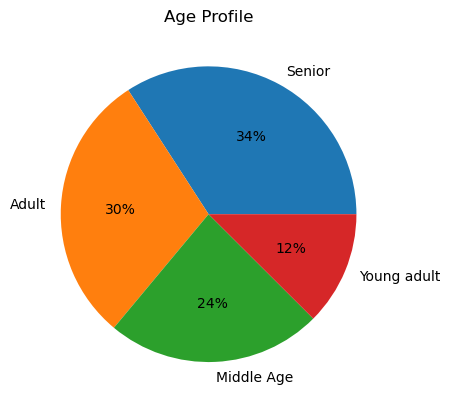

In [12]:
# Create a pie chart for 'age_flag'

pie_chart_age = df_high_activity_cust['age_flag'].value_counts().plot.pie(title = 'Age Profile', label = '', autopct = ('%1.f%%'))

In [14]:
# Export pie_chart_age

pie_chart_age.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pie_chart_age_cust'))

### Find aggregate variables


In [15]:
age_agg = df_high_activity_cust.groupby('age_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [16]:
age_agg

days_since_prior_order                  prices           \
                               min   max       mean    min      max   
age_flag                                                              
Adult                          0.0  30.0  10.726672    1.0  14900.0   
Middle Age                     0.0  30.0  10.739113    1.0  14900.0   
Senior                         0.0  30.0  10.721273    1.0  14900.0   
Young adult                    0.0  30.0  10.715554    1.0  14900.0   

                                    
                  mean         sum  
age_flag                            
Adult        10.405868  70968407.6  
Middle Age   10.757450  58043583.5  
Senior       10.625811  83040991.3  
Young adult  10.801960  30855345.5

### Compare age profile with region


In [17]:
# Create crosstab between age and region

crosstab_age_region = pd.crosstab(df_high_activity_cust['region'], df_high_activity_cust['age_flag'], dropna = False)

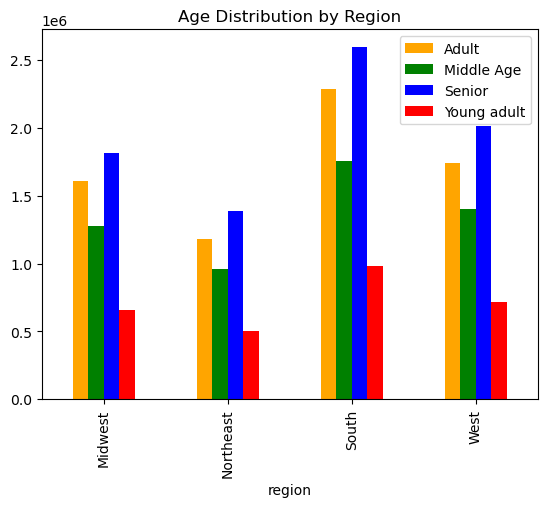

In [19]:
# Create a bar chart

bar_age_region = crosstab_age_region.plot.bar(title = 'Age Distribution by Region', color = {'Young adult': 'red', 'Adult': 'orange', 'Middle Age': 'green', 'Senior': 'blue'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [20]:
# Export bar_age_region

bar_age_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_age_profile_region'))

### Compare age profile with departments

In [21]:
# Import departments_wrangled.csv

df_dep = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [22]:
# Check output

df_dep

,Unnamed: 0,0
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [23]:
# Rename '0' column as 'department'

df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [28]:
# Rename 'Unnamed: 0' column as 'department_id'

df_dep.rename(columns = {'0' : 'department'}, inplace = True)

In [29]:
# Check output

df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [30]:
# Merge df_dep with df_high_activity_cust

df_merged = df_high_activity_cust.merge(df_dep, on = 'department_id')

In [31]:
# Check output

df_merged.head()

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,Loyality Flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,customer_activity,age_flag,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867.0,prior,...,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508.0,prior,...,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584.0,prior,...,New Customer,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age,beverages
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841.0,prior,...,Regular Customer,6.91,Low spender,26.0,Non-frequent customer,both,West,High-activity,Adult,beverages
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720.0,prior,...,Regular Customer,6.91,Low spender,26.0,Non-frequent customer,both,West,High-activity,Adult,beverages


In [32]:
# Create crosstab between age and departments

crosstab_age_departments = pd.crosstab(df_merged['department'], df_merged['age_flag'], dropna = False)

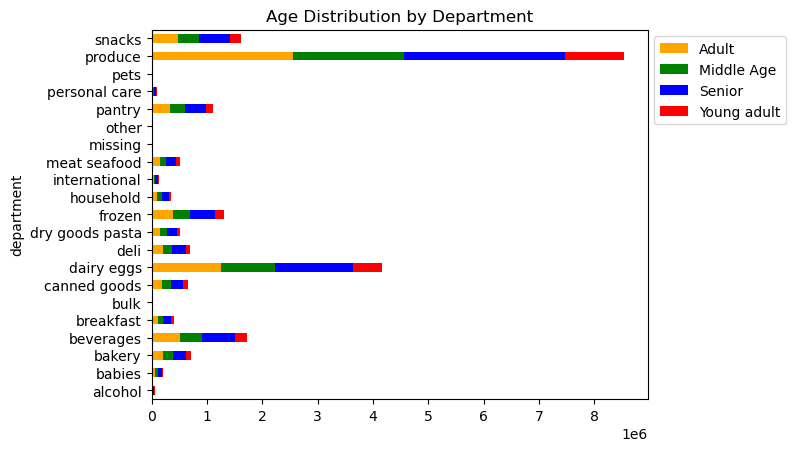

In [33]:
# Create a stacked bar chart

stacked_bar_age_department = crosstab_age_departments.plot.barh(stacked = True, title = 'Age Distribution by Department', color = {'Young adult': 'red', 'Adult': 'orange', 'Middle Age': 'green', 'Senior': 'blue'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

Produce, Dairy/Eggs, Snacks, and Beverages are the most popular departments across all ages

In [34]:
# Export stacked bar chart

stacked_bar_age_department.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'stacked_bar_age_department'))

## Profiling based on income

In [35]:
# Create income_flag

df_merged.loc[df_merged['income'] <= 50000, 'income_flag'] = 'Low income'
df_merged.loc[(df_merged['income'] >50000) & (df_merged['income'] <= 150000), 'income_flag'] = 'Middle income'
df_merged.loc[df_merged['income'] > 150000, 'income_flag'] = 'High income'

In [36]:
# Check value counts

df_merged['income_flag'].value_counts(dropna = False)

Middle income    17646286
High income       2854824
Low income        2386075
Name: income_flag, dtype: int64

In [37]:
# Check output

df_merged.head()

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,customer_activity,age_flag,department,income_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867.0,prior,...,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age,beverages,High income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508.0,prior,...,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age,beverages,High income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584.0,prior,...,8.22,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age,beverages,High income
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841.0,prior,...,6.91,Low spender,26.0,Non-frequent customer,both,West,High-activity,Adult,beverages,Middle income
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720.0,prior,...,6.91,Low spender,26.0,Non-frequent customer,both,West,High-activity,Adult,beverages,Middle income


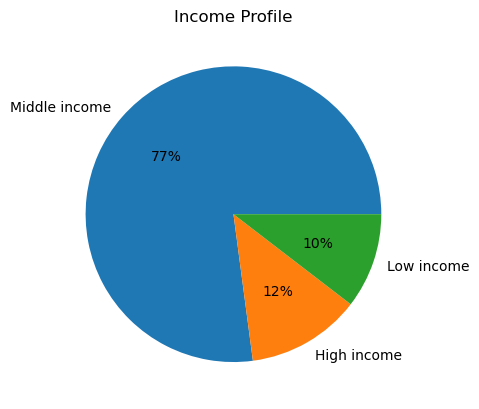

In [38]:
# Create a pie chart for 'income_flag'

pie_chart_income = df_merged['income_flag'].value_counts().plot.pie(title = 'Income Profile', label = '', autopct = ('%1.f%%'))

In [39]:
# Export pie chart

pie_chart_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pie_chart_income_profile'))

### Find aggregate variables

In [40]:
income_agg = df_merged.groupby('income_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [41]:
income_agg

days_since_prior_order                  prices           \
                                 min   max       mean    min      max   
income_flag                                                             
High income                      0.0  30.0  10.624690    1.0  14900.0   
Low income                       0.0  30.0  11.114785    1.0     25.0   
Middle income                    0.0  30.0  10.690572    1.0  14900.0   

                                       
                    mean          sum  
income_flag                            
High income    24.745974   70645400.6  
Low income      6.769731   16153086.9  
Middle income   8.846612  156109840.4

Low income customers have the lowest mean price for orders and a longer duration before placing their next order. Middle income customers generate the majority of sales.

### Compare income profile with region


In [42]:
# Create crosstab between income and region

crosstab_income_region = pd.crosstab(df_merged['region'], df_merged['income_flag'], dropna = False)

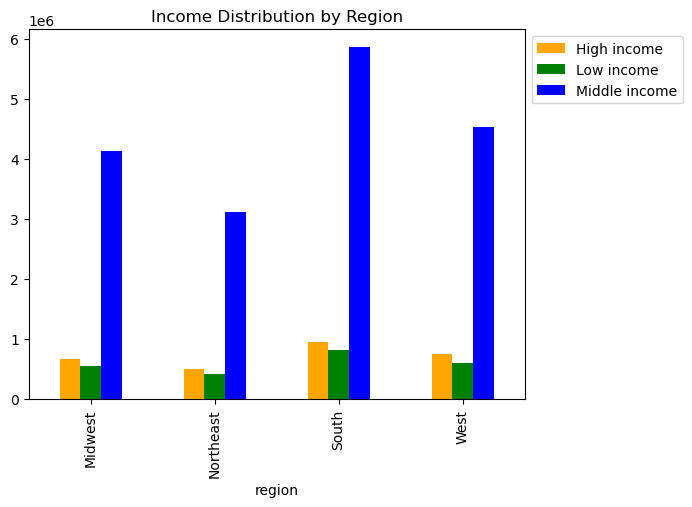

In [43]:
# Create a bar chart

bar_income_region = crosstab_income_region.plot.bar(title = 'Income Distribution by Region', color = {'Low income': 'green', 'Middle income': 'blue', 'High income': 'orange'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [44]:
# Export bar graph

bar_income_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_income_region'))

### Compare income profile with departments


In [45]:
# Create crosstab between income and departments

crosstab_income_departments = pd.crosstab(df_merged['department'], df_merged['income_flag'], dropna = False)

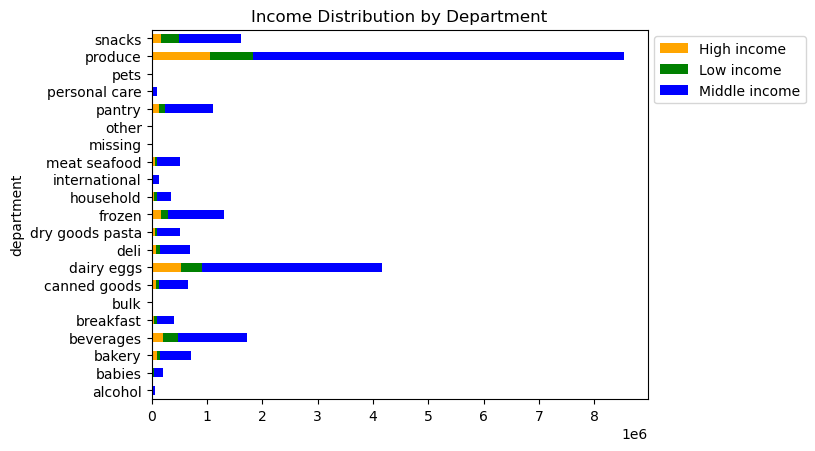

In [46]:
# Create a stacked bar chart

stacked_bar_income_department = crosstab_income_departments.plot.barh(stacked = True, title = 'Income Distribution by Department', color = {'Low income': 'green', 'Middle income': 'blue', 'High income': 'orange'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

High income customers buy more dairy and produce than low income customers, while low income customers buy more snacks than high income customers.

In [47]:
# Export stacked bar chart

stacked_bar_income_department.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'stacked_bar_income_department'))

## Profiling based on number of dependants


In [48]:
# Create role_flag

df_merged.loc[df_merged['n_dependants'] == 0, 'role_flag'] = 'Individual'
df_merged.loc[df_merged['n_dependants'] != 0, 'role_flag'] = 'Caregiver'

In [49]:
# Check value counts

df_merged['role_flag'].value_counts(dropna = False)

Caregiver     17157695
Individual     5729490
Name: role_flag, dtype: int64

In [50]:
# Check output

df_merged.head()

,user_id,sex,state,age,date_joined,n_dependants,fam_status,income,order_id,eval_set,...,spending_flag,median_prior_orders,order_frequency_flag,_merge,region,customer_activity,age_flag,department,income_flag,role_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867.0,prior,...,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age,beverages,High income,Caregiver
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508.0,prior,...,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age,beverages,High income,Caregiver
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584.0,prior,...,Low spender,19.0,Regular customer,both,Midwest,High-activity,Middle Age,beverages,High income,Caregiver
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841.0,prior,...,Low spender,26.0,Non-frequent customer,both,West,High-activity,Adult,beverages,Middle income,Individual
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720.0,prior,...,Low spender,26.0,Non-frequent customer,both,West,High-activity,Adult,beverages,Middle income,Individual


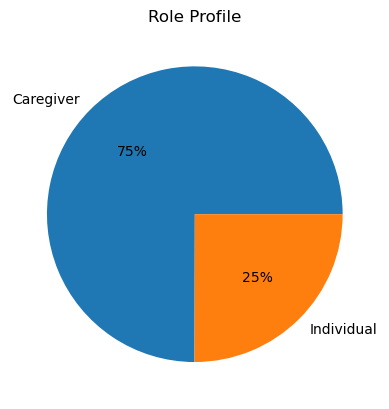

In [51]:
# Create a pie chart for 'role_flag'

pie_chart_role = df_merged['role_flag'].value_counts().plot.pie(title = 'Role Profile', label = '', autopct = ('%1.f%%'))

In [52]:
# Export pie chart

pie_chart_role.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pie_chart_role_profile'))

### Find aggregate variables

In [54]:
role_agg = df_merged.groupby('role_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [55]:
role_agg

days_since_prior_order                  prices                      \
                              min   max       mean    min      max       mean   
role_flag                                                                       
Caregiver                     0.0  30.0  10.735144    1.0  14900.0  10.674396   
Individual                    0.0  30.0  10.700116    1.0  14900.0  10.430299   

                         
                    sum  
role_flag                
Caregiver   183148032.3  
Individual   59760295.6

Caregiver customers generate the majority of sales.

### Compare role profile with region

In [56]:
# Create crosstab between role and region

crosstab_role_region = pd.crosstab(df_merged['region'], df_merged['role_flag'], dropna = False)

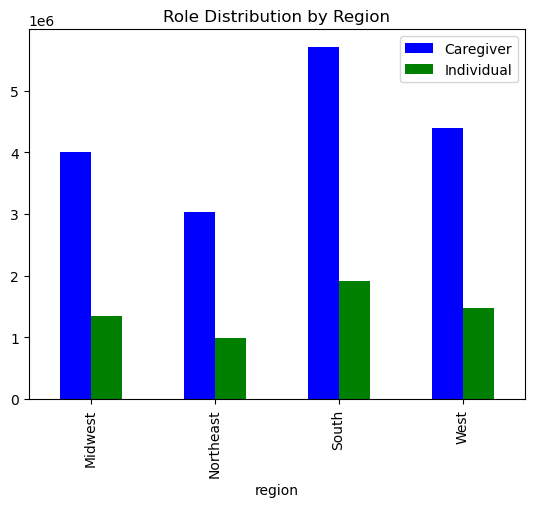

In [57]:
# Create a bar chart

bar_role_region = crosstab_role_region.plot.bar(title = 'Role Distribution by Region', color = {'Caregiver': 'blue', 'Individual': 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

The South region has the most customers

In [58]:
# Export bar graph

bar_role_region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_role_region'))

### Compare role profile with departments


In [59]:
# Create crosstab between role and departments

crosstab_role_departments = pd.crosstab(df_merged['department'], df_merged['role_flag'], dropna = False)

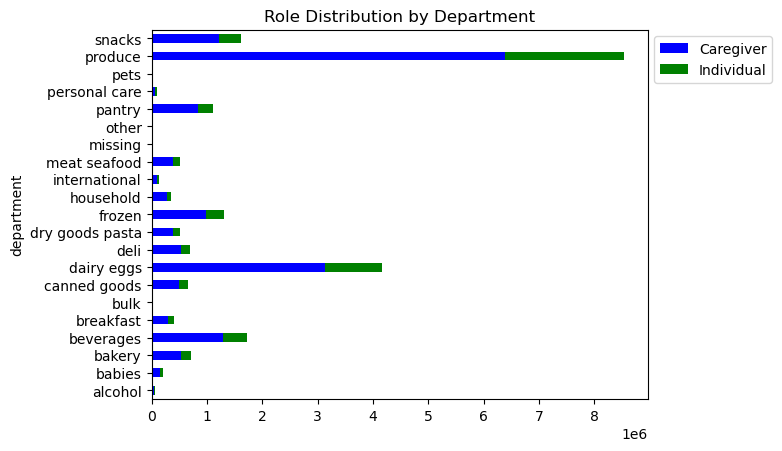

In [60]:
# Create a stacked bar chart

stacked_bar_role_department = crosstab_role_departments.plot.barh(stacked = True, title = 'Role Distribution by Department', color = {'Caregiver': 'blue', 'Individual': 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [62]:
# Export stacked bar chart

stacked_bar_role_department.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'stacked_bar_role_department'))

## Export df_merged

In [63]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22887185 entries, 0 to 22887184
Data columns (total 38 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   sex                     object  
 2   state                   object  
 3   age                     int64   
 4   date_joined             object  
 5   n_dependants            int64   
 6   fam_status              object  
 7   income                  int64   
 8   order_id                float64 
 9   eval_set                object  
 10  order_number            float64 
 11  order_day_of_week       float64 
 12  order_hour_of_day       float64 
 13  days_since_prior_order  float64 
 14  product_id              float64 
 15  add_to_cart_order       float64 
 16  reordered               float64 
 17  product_name            object  
 18  aisle_id                float64 
 19  department_id           float64 
 20  prices                  float64 
 21  price_

In [64]:
df_merged.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df_merged_final.pkl'))